In [45]:
import numpy as np
import matplotlib.pyplot as plt

In [46]:
# UNIFORM RANDOM DISTRIBUTION OF POINTS ON UNIT SPHERE.
def random_spin():
    x = np.random.normal(0, 1, 3)
    x = x/np.sqrt(x@x)
    
    return x

# RETURN THE VALUE OF SPIN MAGNITUDE.
def spin(j):
    s = spin_config[j]
    if (len(s) == 3):
        spin_val = 1
    elif (len(s) == 1):
        spin_val = 0
        
    return spin_val

# INITIALIZE ENERGY OF THE SYSTEM.
def initialize_energy():
    Energy = 0
    for i in range(n):
        Energy += J1*(spin_config[i]@spin_config[(i+1)%n])
        Energy += J2*(spin_config[i]@spin_config[(i+2)%n])
        
    return Energy

In [78]:
# DEFINE THE LATTICE.
n = 50
beta = 100
J1 = 4
J2 = -2.5

global spin_config
spin_config = np.zeros((n), dtype=np.ndarray)

for i in range(n):
        spin_config[i] = random_spin()    
    
global E 
E = initialize_energy()

# print(spin_config, E)

In [69]:
def dot(v1, v2):
    if (len(v1) == 3 and len(v2) == 3):
        dot_prod = v1@v2
    else:
        dot_prod = 0
        
    return dot_prod

def dist(ix, jx):
    r = abs(ix - jx)
    if (r >= n/2):
        distance = n - r
    else:
        distance = r
    
    return distance

In [70]:
def make_dimer(ix):
    global E
    global spin_config

    # jx is the selected neighbour. ix is the original site.

    unpaired_list = []
    for nbr in [(ix-2), (ix-1), (ix+1), (ix+2)]:
        if (spin((nbr)%n) == 1):
            unpaired_list.append(nbr)
    
    if(len(unpaired_list)==0):
        return
    
    else:
        jx = np.random.choice(unpaired_list)



        if (dist(ix, jx) == 1):
            J = J1
        elif(dist(ix, jx) == 2):
            J = J2

        jx = jx%n

        # Calculate the change in energy if dimer is formed.
        E_1 = -(3*J/4)
        E_2 = - (J1/4)*(dot(spin_config[ix], spin_config[(ix - 1)%n]) + dot(spin_config[ix], spin_config[(ix + 1)%n]) + dot(spin_config[jx], spin_config[(jx - 1)%n]) + dot(spin_config[jx], spin_config[(jx + 1)%n]))
        E_3 = - (J2/4)*(dot(spin_config[ix], spin_config[(ix - 2)%n]) + dot(spin_config[ix], spin_config[(ix + 2)%n]) + dot(spin_config[jx], spin_config[(jx - 2)%n]) + dot(spin_config[jx], spin_config[(jx + 2)%n]))
        E_4 = (J/4)*(dot(spin_config[ix], spin_config[jx]))

        dE = E_1 + E_2 + E_3 + E_4

        # Metropolis implementation.

        p_accept = min(1, np.exp(-beta*dE))
        if (np.random.random() <= p_accept):
            spin_config[ix] = [jx]
            spin_config[jx] = [ix]
            E += dE

In [71]:
def spin_rotation(ix):
    global E
    global spin_config

    spin_new = random_spin()
    dS = spin_new - spin_config[ix]
    
    # Calculating change in E.
    dE = J1*(dot(dS, spin_config[(ix - 1)%n]) + dot(dS, spin_config[(ix + 1)%n])) + J2*(dot(dS, spin_config[(ix - 2)%n]) + dot(dS, spin_config[(ix + 2)%n]))
    
    # Metropolis implementation.
    
    p_accept = min(1, np.exp(-beta*dE))
    if (np.random.random() <= p_accept):
        spin_config[ix] = spin_new
        E += dE

In [72]:
def break_dimer(ix):
    global E
    global spin_config

    jx = spin_config[ix][0]
    
    if (dist(ix, jx) == 1):
        J = J1
    elif(dist(ix, jx) == 2):
        J = J2
     
    spin_config_new = np.copy(spin_config)

    # Modifying a copy of the spin configutation.
    
    spin_config_new[ix] = random_spin()
    spin_config_new[jx] = random_spin()
    
    E_1 = +(3*J)/4
    E_2 = + (J1/4)*(dot(spin_config_new[ix], spin_config_new[(ix - 1)%n]) + dot(spin_config_new[ix], spin_config_new[(ix + 1)%n]) + dot(spin_config_new[jx], spin_config_new[(jx - 1)%n]) + dot(spin_config_new[jx], spin_config_new[(jx + 1)%n]))
    E_3 = + (J2/4)*(dot(spin_config_new[ix], spin_config_new[(ix - 2)%n]) + dot(spin_config_new[ix], spin_config_new[(ix + 2)%n]) + dot(spin_config_new[jx], spin_config_new[(jx - 2)%n]) + dot(spin_config_new[jx], spin_config_new[(jx + 2)%n]))
    E_4 = -(J/4)*(dot(spin_config_new[ix], spin_config_new[jx]))
    
    dE = E_1 + E_2 + E_3 + E_4
    
    # Metropolis implementation.
    
    p_accept = min(1, np.exp(-beta*dE))
    if (np.random.random() <= p_accept):
        spin_config[ix] = spin_config_new[ix]
        spin_config[jx] = spin_config_new[jx]
        E += dE

In [73]:
# MONTE CARLO SWEEP (RANDOM)

def monte_carlo_sweep(ix):
    
    # f tunes the ratio of random spin rotations to dimer formation. Increase f to increase dimer formation.
    f = 0.5
    
    # If the chosen site has a free spin.
    if (spin(ix) == 1):
        if (f <= np.random.random()):
            spin_rotation(ix)
        else:
            make_dimer(ix)
            
    # If the chosen site is part of a dimer.        
    elif (spin(ix) == 0):
        break_dimer(ix)
        
    

In [79]:
spin_config

array([array([-0.21938297, -0.75820676,  0.61399807]),
       array([ 0.07689659, -0.82110157, -0.56557858]),
       array([ 0.68235064, -0.54712066,  0.48482634]),
       array([-0.53969361, -0.68969588, -0.48275294]),
       array([-0.16986717, -0.71365433, -0.67959005]),
       array([-0.62561245,  0.21260788, -0.75060439]),
       array([ 0.69871024,  0.64736101, -0.30451227]),
       array([0.84627545, 0.525605  , 0.08693243]),
       array([ 0.23886087, -0.71500352, -0.65705057]),
       array([-0.33814786, -0.34030081, -0.87741175]),
       array([ 0.64594732,  0.26696786, -0.71517846]),
       array([ 0.66196985, -0.16232033,  0.73174314]),
       array([-0.79562854, -0.57918382,  0.17754245]),
       array([-0.89768199,  0.38320802, -0.21752854]),
       array([0.1270009 , 0.33972653, 0.93191022]),
       array([ 0.54493764, -0.71760222,  0.43369348]),
       array([ 0.89045014,  0.18548414, -0.4155649 ]),
       array([ 0.02497953, -0.19985327,  0.97950737]),
       array([ 0

In [80]:
nsweeps = 100000

for i in range(nsweeps):
    ix = int(np.random.random()*n)
    monte_carlo_sweep(ix)

count_dimer = 0
for i in range(n):
    if (len(spin_config[i]) == 1):
        count_dimer +=1
        
print(spin_config)
print(count_dimer)

C:\Users\frmnv\AppData\Local\Temp/ipykernel_32244/1886784959.py:13: RuntimeWarning: overflow encountered in exp
  p_accept = min(1, np.exp(-beta*dE))


[list([49]) array([-0.0969198 , -0.75777999, -0.64527207]) list([3])
 list([2]) list([5]) list([4]) list([7]) list([6]) list([9]) list([8])
 list([11]) list([10]) list([13]) list([12]) list([15]) list([14])
 list([17]) list([16]) list([19]) list([18]) list([21]) list([20])
 list([23]) list([22]) list([25]) list([24]) list([27]) list([26])
 list([29]) list([28]) list([31]) list([30]) list([33]) list([32])
 list([35]) list([34]) list([37]) list([36]) list([39]) list([38])
 array([-0.18309543, -0.41601559,  0.89073402]) list([42]) list([41])
 list([44]) list([43]) list([46]) list([45]) list([48]) list([47])
 list([0])]
48


In [81]:
E/n

-1.8442566734191461

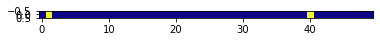

In [82]:
spin_state = np.zeros((n))

for i in range(n):
    if (len(spin_config[i]) == 3):
        spin_state[i] = 1

spin_state
plt.imshow(np.array([np.array(spin_state)]) , cmap = 'plasma' , interpolation = 'nearest' )
plt.show()

In [57]:
# Blue = Dimer
# Yellow = Free Spins